In [1]:
import pandas as pd
import numpy as np
from GetData import main
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

In [2]:
data = main()

Do you have a saved file (Y/N)?:N
Please enter the starting year of the academic year you're interested in (1990-2017) or all:all
Starting download of year: 1990Starting download of year: 1991
Starting download of year: 1992

Starting download of year: 1993
Starting download of year: 1994Starting download of year: 1995Starting download of year: 1996


Starting download of year: 1998Starting download of year: 1997

Starting download of year: 1999
Starting download of year: 2000
Starting download of year: 2001
Starting download of year: 2002
Starting download of year: 2003
Starting download of year: 2004
Starting download of year: 2005
Starting download of year: 2006
Starting download of year: 2007
Starting download of year: 2008
Starting download of year: 2009
Starting download of year: 2010
Starting download of year: 2011
Starting download of year: 2012
Starting download of year: 2013
Starting download of year: 2014
Starting download of year: 2015
Starting download of year: 2016


In [4]:
print(data)
print(data[0])

[['Lecture' '5177' '173' ..., '549' '01' '1990']
 ['Lecture' '5178' '17' ..., '607' '01' '1990']
 ['Lecture' '1504' '21' ..., '607' '01' '1990']
 ..., 
 ['Lecture' '35859' '0' ..., '321' '03' '2015']
 ['Lecture' '35860' '5' ..., '408' '03' '2015']
 ['Lecture' '35861' '13' ..., '423' '03' '2015']]
['Lecture' '5177' '173' '175' 'tba' 'tba' 'tba' 'Opt' 'ANTH' '549' '01'
 '1990']


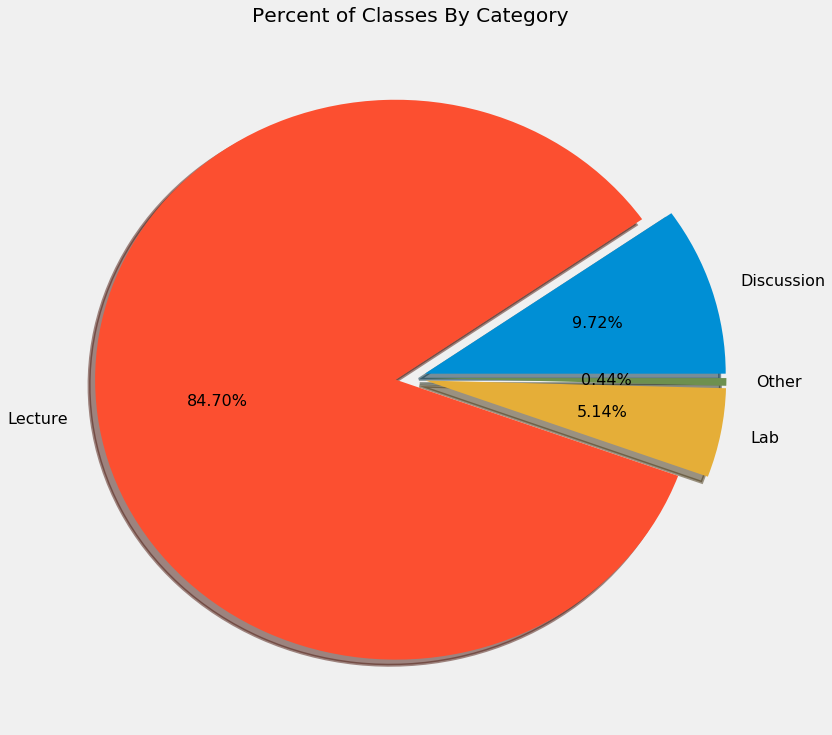

In [5]:
typeOfClass = {"Discussion":0, "Lecture":0, "Lab":0, "Other":0}
for c in range(len(data)):
    if data[c][0] in typeOfClass:
        typeOfClass[data[c][0]] += 1
    else:
        typeOfClass["Other"] += 1
        
raw = {"Type":["Discussion", "Lecture", "Lab", "Other"],
      "Count":[typeOfClass["Discussion"],typeOfClass["Lecture"],typeOfClass["Lab"],typeOfClass["Other"]]}
classTypeData = pd.DataFrame(raw, columns = ["Type", "Count"])
#print(classTypeData)

classTypeData["Total"] = sum([int(row[1]["Count"]) for row in classTypeData.iterrows()])

style.use("fivethirtyeight")
axes = classTypeData.plot.pie("Count",explode=[0.05,0.05,0.05,0.05], labels=classTypeData["Type"], legend = False, \
                     fontsize=16, autopct='%.2f%%', figsize=(12,12), shadow=True, wedgeprops={'linewidth':3})
axes.set_ylabel('')
plt.title("Percent of Classes By Category")
plt.show()

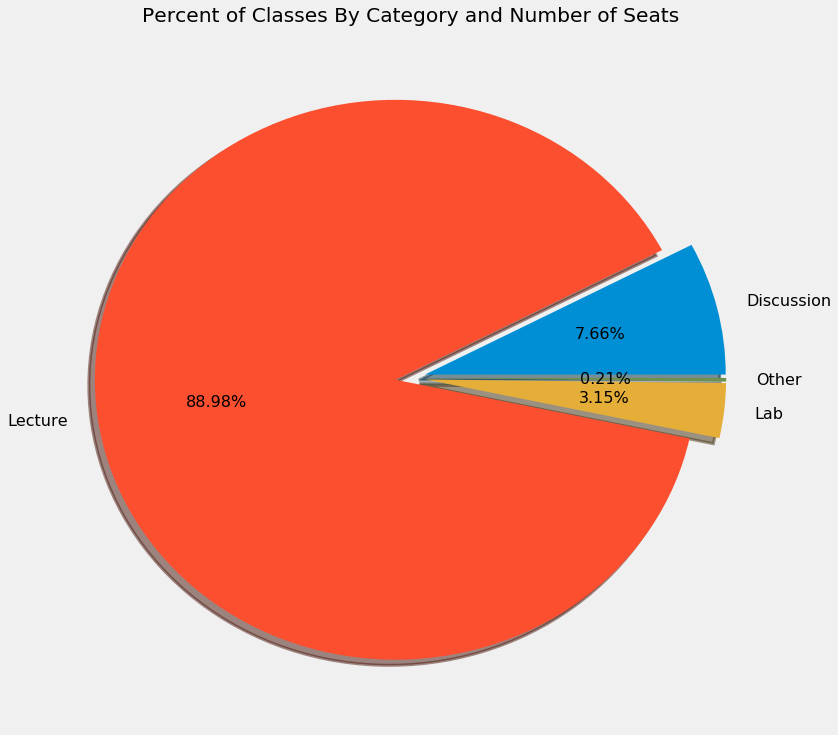

In [6]:
typeOfClass = {"Discussion":0, "Lecture":0, "Lab":0, "Other":0}
for c in range(len(data)):
    if data[c][0] in typeOfClass:
        typeOfClass[data[c][0]] += int(data[c][3])
    else:
        typeOfClass["Other"] += 15
        
raw = {"Type":["Discussion", "Lecture", "Lab", "Other"],
      "Count":[typeOfClass["Discussion"],typeOfClass["Lecture"],typeOfClass["Lab"],typeOfClass["Other"]]}
classTypeData = pd.DataFrame(raw, columns = ["Type", "Count"])
#print(classTypeData)

classTypeData["Total"] = sum([int(row[1]["Count"]) for row in classTypeData.iterrows()])

style.use("fivethirtyeight")
axes = classTypeData.plot.pie("Count",explode=[0.05,0.05,0.05,0.05], labels=classTypeData["Type"], legend = False, \
                     fontsize=16, autopct='%.2f%%', figsize=(12,12), shadow=True, wedgeprops={'linewidth':3})
axes.set_ylabel('')
plt.title("Percent of Classes By Category and Number of Seats")
plt.show()

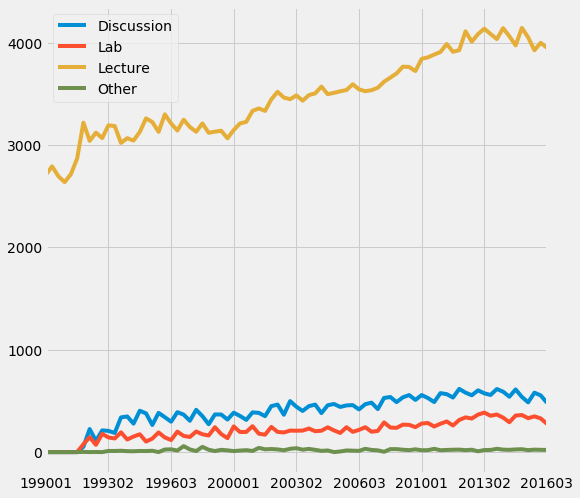

In [19]:
classTypes = {"Discussion":0, "Lecture":0, "Lab":0, "Other":0}
termData = {}
for section in data:
    if not (section[-1]+section[-2]) in termData:
        termData[section[-1]+section[-2]] = classTypes.copy()
    if section[0] in classTypes:
        termData[section[-1]+section[-2]][section[0]] += 1
    else:
        termData[section[-1]+section[-2]]["Other"] += 1
        
df = pd.DataFrame(termData).T
df.plot.line(figsize=(8,8))